# PART A
## 1. Data Understanding & Exploration: [5 Marks]
### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
!pip install imblearn
#!pip install xgboost
from scipy.stats import zscore
from xgboost import XGBClassifier
from math import sqrt
from sklearn.model_selection import cross_validate,GridSearchCV, StratifiedKFold
from functools import reduce
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle

In [2]:
churn1=pd.read_csv("TelcomCustomer-Churn_1.csv")
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [3]:
churn2=pd.read_csv("TelcomCustomer-Churn_2.csv")
churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [4]:
churn1.shape

(7043, 10)

In [5]:
churn2.shape

(7043, 12)

In [6]:
churn_merge=pd.merge(churn1,churn2,on=["customerID"])
churn_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn_merge.shape

(7043, 21)

### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [8]:
def validate_cols_list(churn_merge, churn1, churn2):
    churn1_cols=list(churn1.columns)
    churn2_cols=list(churn2.columns)
    list_set = set(churn1_cols+churn2_cols)
    unique_list_all_df = (list(list_set))
    unique_list_all_df.sort()
    print("Unique list of cols from all dataframes :{}".format(unique_list_all_df))
    churn_merge_cols=list(churn_merge.columns)
    churn_merge_cols.sort()
    print("\nUnique list of cols from merged dataframe:{}".format(churn_merge_cols))
    missing_cols=[]
    for cols in unique_list_all_df:
        if cols not in churn_merge_cols:
            missing_cols.append(cols)
    print("\nmissing_cols:{}".format(missing_cols))
    if len(missing_cols)==0:
        print("\nThe columns in merged dataframe includes all the columns in all the individual dataframes!")
    else:
        print("\nThe columns in merged dataframe does not include all the columns in the individual dataframes!!")

In [9]:
validate_cols_list(churn_merge, churn1, churn2)

Unique list of cols from all dataframes :['Churn', 'Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'TotalCharges', 'customerID', 'gender', 'tenure']

Unique list of cols from merged dataframe:['Churn', 'Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'TotalCharges', 'customerID', 'gender', 'tenure']

missing_cols:[]

The columns in merged dataframe includes all the columns in all the individual dataframes!


## 2. Data Cleaning & Analysis: [5 Marks]
### A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [10]:
churn_merge.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
churn_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
churn_merge.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [13]:
churn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
for cols in churn_merge.columns:
    print("Number of null values for {0} cols is {1}".format(cols,churn_merge[cols].isnull().sum()))
    print("\nUnique values and its counts for {}".format(cols))
    print(churn_merge[cols].value_counts())
    print("\n*********************************************")

Number of null values for customerID cols is 0

Unique values and its counts for customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

*********************************************
Number of null values for gender cols is 0

Unique values and its counts for gender
Male      3555
Female    3488
Name: gender, dtype: int64

*********************************************
Number of null values for SeniorCitizen cols is 0

Unique values and its counts for SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

*********************************************
Number of null values for Partner cols is 0

Unique values and its counts for Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

*********************************************
Number of null values for Dependents cols is 0

Unique values and it

###### When analyzing the above results, there are no null values. TotalCharges has 11 non-numeric vlaues i.e blanks. These blank values can be replaced by np.nan to make it numeric

In [15]:
churn_merge["TotalCharges"]=churn_merge["TotalCharges"].replace(' ', np.nan)
churn_merge["TotalCharges"]=churn_merge["TotalCharges"].astype(float)

In [16]:
churn_merge.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

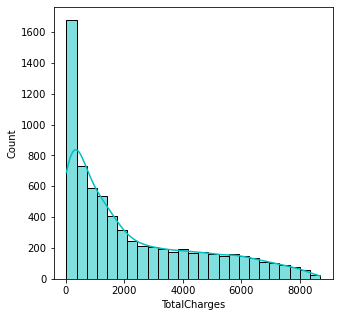

In [17]:
plt.figure(figsize=(5,5))
sns.histplot(data=churn_merge,x="TotalCharges",kde=True,color="c")

In [18]:
churn_merge.loc[churn_merge["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


For these 11 records where TotalCharges is blank, when analyzing other columns it seems that they are new customers. Tenure is 0 and churn is also 0. So TotalCharges incurred by these new customers can be set as 0. 

In [19]:
churn_final=churn_merge.copy()

In [20]:
churn_final.loc[churn_final["TotalCharges"].isnull()==True,"TotalCharges"]=0

In [21]:
churn_final.loc[churn_final["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [22]:
churn_final["TotalCharges"].value_counts()

0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

In [23]:
churn_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]

In [24]:
float_cols=["MonthlyCharges","TotalCharges"]
for cols in float_cols:
    churn_final[cols]=churn_final[cols].astype(float)

In [25]:
churn_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]

In [26]:
def draw_pie_chart(df, categorical_cols):
    plt.figure(figsize=(25,40))
    index = 1
    for col in categorical_cols:
        plt.subplot(6,4,index)
        plt.rcParams['font.size'] = 14
        col_value_counts=churn_final[col].value_counts()
        col_value_counts.plot.pie(autopct="%.2f%%",textprops={'fontsize': 14})
        plt.title("Distribution of {}".format(col), fontsize=22)
        index+= 1

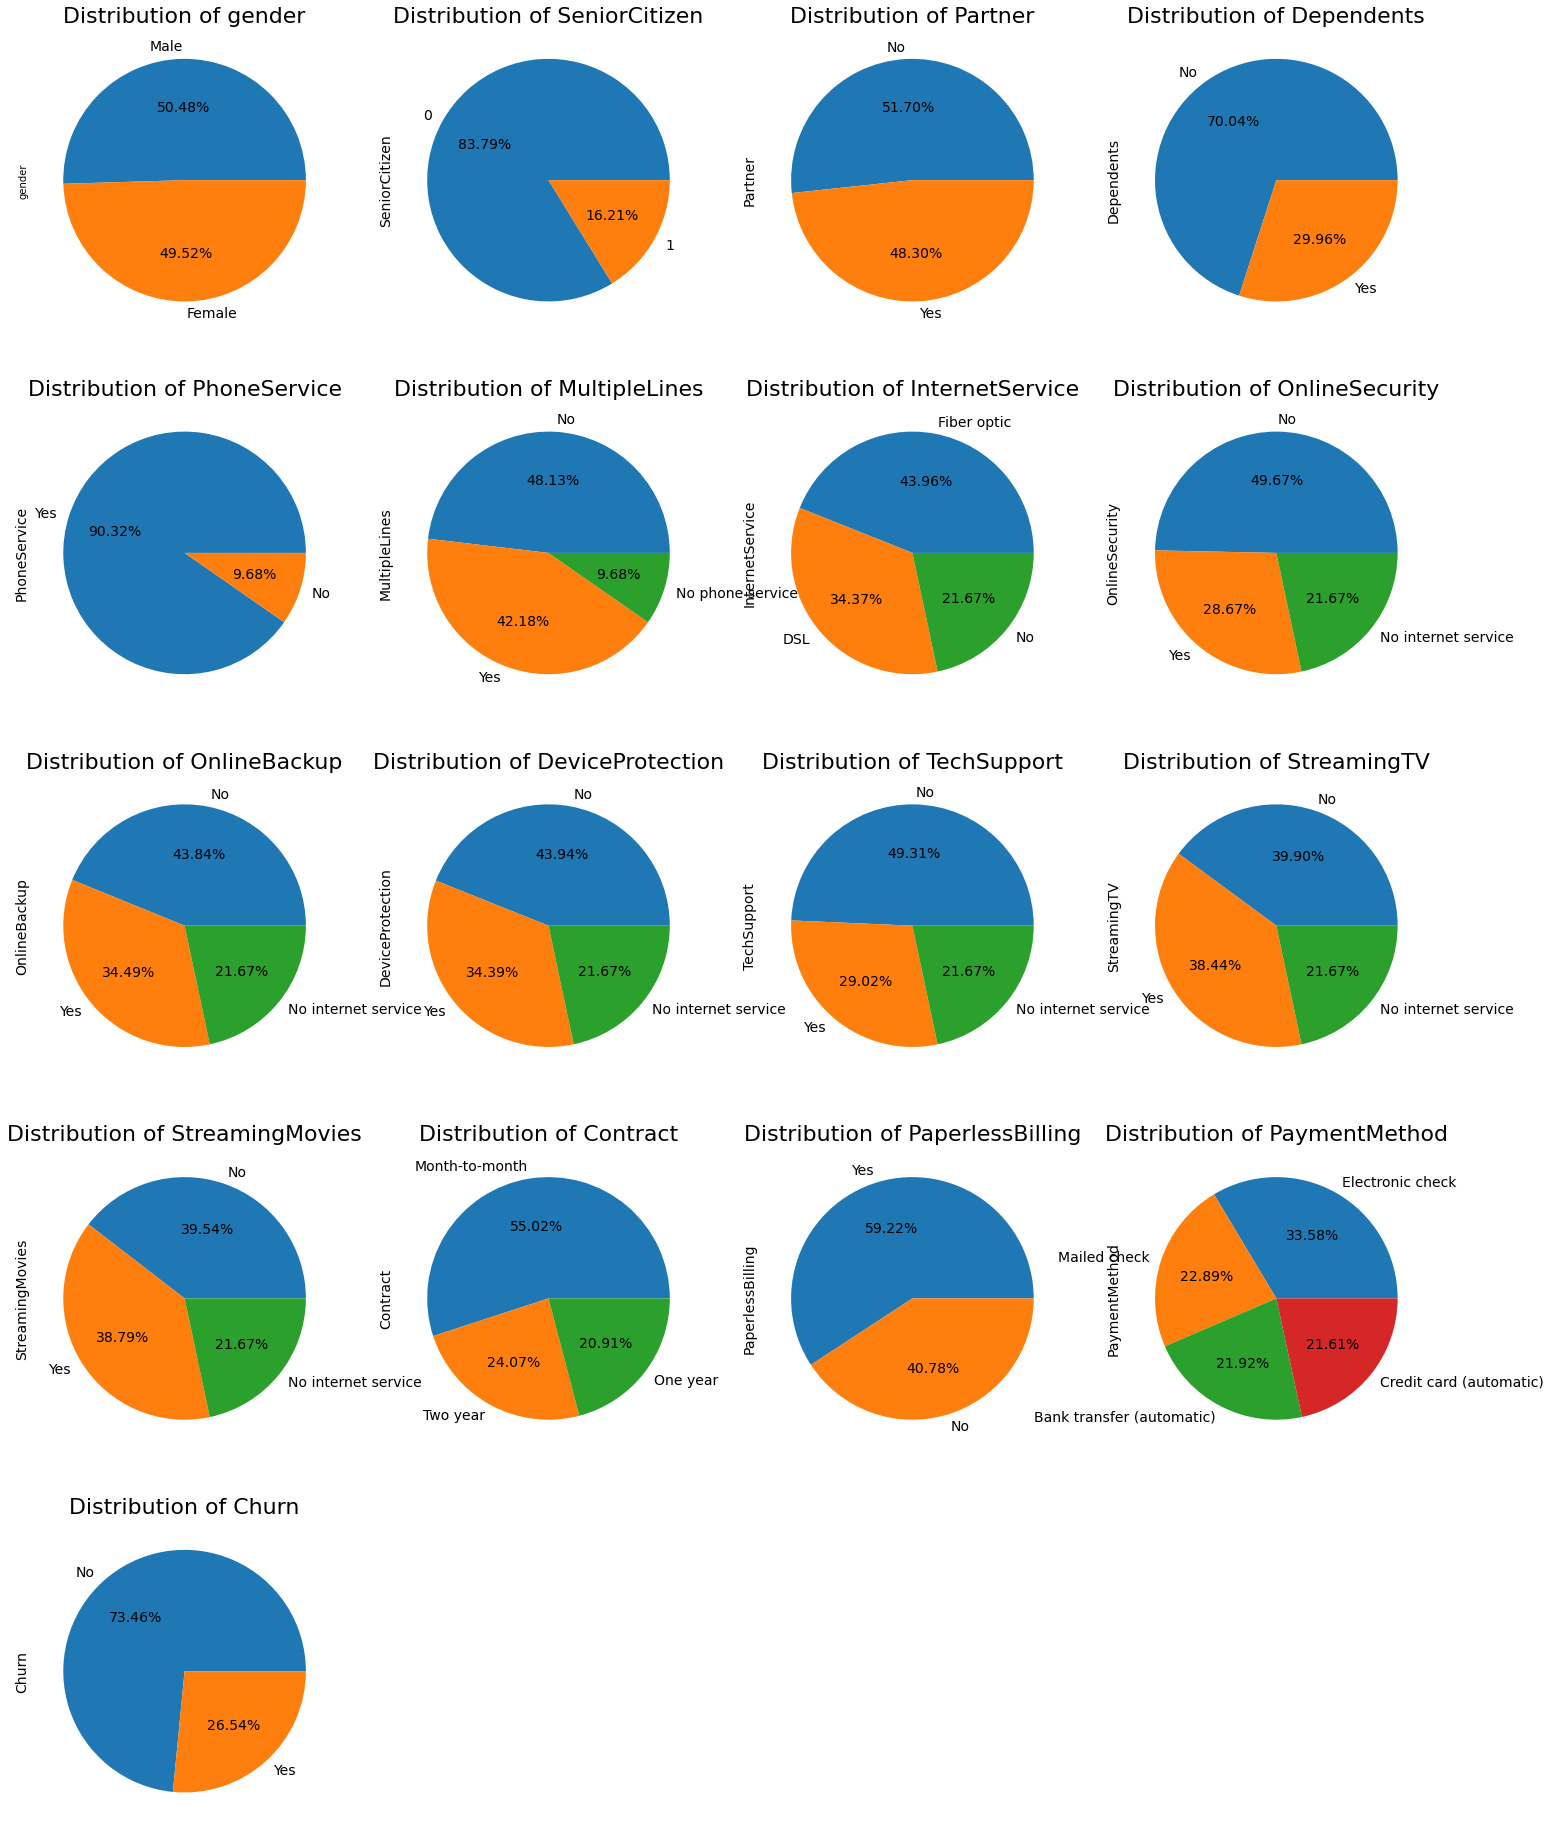

In [27]:
categorical_cols=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
                      "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",
                      "PaperlessBilling","PaymentMethod","Churn"]
draw_pie_chart(churn_final, categorical_cols)

### D. Share insights for Q2.c. [2 Marks]

#### Insights from the pie-charts:
- Gender: Male and Female entries are equally distributed.
- SeniorCitizen: Around 83.79% are non-senior citizens. Very few people are senior citizens in the entire dataset.
- Partners: Around half of the population are partners 
- Dependents : Around 70% of the population do not have any dependents. 
- PhoneService : Around 90% population have phone service and rest 10% do not have phone service. 
- MultipleLines : Around 42% of the population have multiple lines and 48% of them do not have multiple lines and 9.6% of them do not have phone service at all
- InternetService : 21.67% of the population do not have internet service at all, where as 34.3% have DSL connection and 43.9% have fiber optic.
- OnlineSecurity : Around 28% of the population have online security, around 49% of the population do not have online security  service and 21.67% of the population do not have internet service at all.
- OnlineBackup : Around 34% of the population have online backup, around 48% of the population do not have online backup  service and 21.67% of the population do not have internet service at all.
- DeviceProtection : Around 34% of the population have device protection, around 48% of the population do not have device protection and 21.67% of the population do not have internet service at all.
- TechSupport : Around 29% of the population have tech support, around 49% of the population do not have tech support and 21.67% of the population do not have internet service at all.
- StreamingTV : Around 38% of the population have streaming TV, around 39.9% of the population do not have streaming TV and 21.67% of the population do not have internet service at all.
- StreamingMovies : Around 38% of the population have streaming movies, around 39.5% of the population do not have streaming movies and 21.67% of the population do not have internet service at all.
- Contract : Around 55.02% of the population have month-to-month contract, 20.91% of the population have One year contract and 24.07% of the population have two year contract.  
- PaperlessBilling : Around 59% of the population have paperless billing and 40.78% of the population do not have paperless billing.
- PaymentMethod : 33.58% of the population have electronic check, 22.89% have mailed check, 21.92% have automatic bank transfer and 21.61% have automatic credit crad payments.
- Churn : 73.46% of the population do not leave the company and 26.54% of the population leave the company.

### E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [28]:
churn_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
str_categorical_cols=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService",
                      "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",
                      "PaperlessBilling","PaymentMethod","Churn"]
for col in str_categorical_cols:
    churn_final[col]=churn_final[col].str.lower()
churn_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-GNVDE,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,3668-QPYBK,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-CFOCW,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-HQITU,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [30]:
replaceStruct = {"gender": {"male": 0, "female": 1},"Partner": {"no": 0, "yes": 1},"Dependents": {"no": 0, "yes": 1},"PhoneService": {"no": 0, "yes": 1},
                 "MultipleLines": {"no phone service": "no_phone_service"},"InternetService": {"no": 0, "dsl": 1, "fiber optic": 2},
                 "OnlineSecurity": {"no internet service": "no_internet_service"},"OnlineBackup": {"no internet service": "no_internet_service"},
                 "DeviceProtection": {"no internet service": "no_internet_service"},"TechSupport": {"no internet service": "no_internet_service"},
                 "StreamingTV": {"no internet service": "no_internet_service"},"StreamingMovies": {"no internet service": "no_internet_service"},
                 "Contract": {"month-to-month": 1, "one year": 2,"two year": 3}, "PaperlessBilling": {"no": 0, "yes": 1},"Churn": {"no": 0, "yes": 1},
                 "PaymentMethod": {"bank transfer (automatic)":"bank_transfer","credit card (automatic)":"credit_card",
                                   "electronic check":"electronic_check","mailed check" :"mailed_check"}
                }
oneHotCols=["MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaymentMethod"]

In [31]:
churn_df=churn_final.copy()

In [32]:
churn_df=churn_df.replace(replaceStruct)
churn_df=pd.get_dummies(churn_df, columns=oneHotCols)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,...,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,PaymentMethod_bank_transfer,PaymentMethod_credit_card,PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,7590-VHVEG,1,0,1,0,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,1,2,0,...,1,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,1,2,0,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,2,1,1,...,1,0,0,1,0,0,0,0,1,0


### F. Split the data into 80% train and 20% test. [1 Marks]

In [33]:
X=churn_df.drop(columns=['customerID','Churn'],axis=1)
y=churn_df[['Churn']]
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,PaymentMethod_bank_transfer,PaymentMethod_credit_card,PaymentMethod_electronic_check,PaymentMethod_mailed_check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,1.222916,1.690473,0.592219,64.761692,...,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.778877,0.833755,0.491457,30.090047,...,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,0.000000,35.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,70.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,2.000000,1.000000,89.850000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,3.000000,1.000000,118.750000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
y.describe()

,Churn
count,7043.000000
mean,0.265370
std,0.441561
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


##### Since this is a binary classification problem, i.e whether the customer has probability to churn or not churn, we need to ensure the churn & not churn distribution is similar between train and test dataset.

In [35]:
#lets use random seed 5 and check how y is distributed between train and test.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5,stratify=y)
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,PaymentMethod_bank_transfer,PaymentMethod_credit_card,PaymentMethod_electronic_check,PaymentMethod_mailed_check
3031,1,1,1,0,50,1,2,1,1,71.05,...,1,0,0,1,0,0,0,0,1,0
4569,1,0,0,0,22,1,1,1,1,48.80,...,1,0,0,1,0,0,0,1,0,0
6636,1,0,1,1,10,1,1,2,0,70.30,...,0,0,1,1,0,0,0,0,1,0
3067,0,0,0,0,6,1,2,1,1,84.40,...,1,0,0,0,0,1,0,0,1,0
5769,1,0,1,1,71,1,2,3,1,109.00,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,1,0,0,0,15,1,1,1,0,48.85,...,1,0,0,1,0,0,0,0,1,0
6881,1,0,1,1,32,0,1,1,1,35.15,...,1,0,0,1,0,0,0,0,1,0
2906,1,0,1,1,6,1,1,1,1,48.80,...,1,0,0,1,0,0,0,0,0,1
2823,0,0,1,0,39,1,0,3,1,20.45,...,0,1,0,0,1,0,1,0,0,0


In [36]:
y_train.value_counts()

Churn
0        4139
1        1495
dtype: int64

In [37]:
y_train.loc[y_train["Churn"]==1].sum()/len(y_train)

Churn    0.265353
dtype: float64

In [38]:
y_test.loc[y_test["Churn"]==1].sum()/len(y_test)

Churn    0.265436
dtype: float64

#### Both train and test dataset has similar distribution of churn (~26.5% of churn) . We can now proceed with model build and tuning.

### G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

Decision trees do not require normalization of input data. Since XGBoost is an ensemble algorithm comprised of decision trees, it does not require normalization for the input data as well. If really needed, minmaxscaler can be applied.

In [39]:
scaler = MinMaxScaler()
train_features=X
mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)
X_train = mod_scaler.transform(X_train)
X_test = mod_scaler.transform(X_test)

train_features = pd.DataFrame(train_features, columns = X.columns)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [40]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,PaymentMethod_bank_transfer,PaymentMethod_credit_card,PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,1.0,1.0,1.0,0.0,0.694444,1.0,1.0,0.0,1.0,0.525373,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.305556,1.0,0.5,0.0,1.0,0.303980,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.138889,1.0,0.5,0.5,0.0,0.517910,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.083333,1.0,1.0,0.0,1.0,0.658209,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.986111,1.0,1.0,1.0,1.0,0.902985,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [41]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,PaymentMethod_bank_transfer,PaymentMethod_credit_card,PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,1.0,0.0,1.0,1.0,0.500000,1.0,0.0,1.0,0.0,0.019900,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.777778,1.0,1.0,0.5,1.0,0.858706,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.791667,1.0,0.5,1.0,1.0,0.558209,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.180556,1.0,1.0,0.0,1.0,0.704478,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.916667,1.0,0.5,1.0,1.0,0.609453,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [42]:
y_train.head()

,Churn
3031,1
4569,1
6636,0
3067,1
5769,0


In [43]:
y_test.head()

,Churn
4187,0
638,1
2791,0
1607,1
2666,0


## 3. Model building and Improvement: [10 Marks]
### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]

### Building baseline model using XGBoost :

In [44]:
xgb_clf = XGBClassifier(objective='binary:logistic',seed=5,use_label_encoder=False)

In [45]:
xgb_clf.fit(X_train, y_train.values.ravel(),verbose=True,eval_metric='aucpr',eval_set=[(X_test, y_test.values.ravel())])  


[0]	validation_0-aucpr:0.63287
[1]	validation_0-aucpr:0.64442
[2]	validation_0-aucpr:0.64502
[3]	validation_0-aucpr:0.64947
[4]	validation_0-aucpr:0.65939
[5]	validation_0-aucpr:0.66076
[6]	validation_0-aucpr:0.66580
[7]	validation_0-aucpr:0.66497
[8]	validation_0-aucpr:0.66507
[9]	validation_0-aucpr:0.66899
[10]	validation_0-aucpr:0.66852
[11]	validation_0-aucpr:0.66978
[12]	validation_0-aucpr:0.66730
[13]	validation_0-aucpr:0.66223
[14]	validation_0-aucpr:0.66257
[15]	validation_0-aucpr:0.66345
[16]	validation_0-aucpr:0.66029
[17]	validation_0-aucpr:0.65937
[18]	validation_0-aucpr:0.65551
[19]	validation_0-aucpr:0.65528
[20]	validation_0-aucpr:0.65523
[21]	validation_0-aucpr:0.65493
[22]	validation_0-aucpr:0.65522
[23]	validation_0-aucpr:0.65548
[24]	validation_0-aucpr:0.65395
[25]	validation_0-aucpr:0.65395
[26]	validation_0-aucpr:0.65260
[27]	validation_0-aucpr:0.65449
[28]	validation_0-aucpr:0.65415
[29]	validation_0-aucpr:0.65348
[30]	validation_0-aucpr:0.65432
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [46]:
predicted_labels_train = xgb_clf.predict(X_train)

In [47]:
xgb_clf.score(X_train, y_train)

0.9337948171813987

In [48]:
xgb_clf.score(X_test, y_test)

0.7814052519517388

Confusion Matrix


<AxesSubplot:>

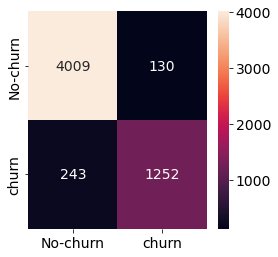

In [49]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm_train=metrics.confusion_matrix(y_train, predicted_labels_train, labels=[0,1])

df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["No-churn","churn"]],
                  columns = [i for i in ["No-churn","churn"]])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_train, annot=True,fmt='g')

In [50]:
predicted_labels_test = xgb_clf.predict(X_test)

Confusion Matrix


<AxesSubplot:>

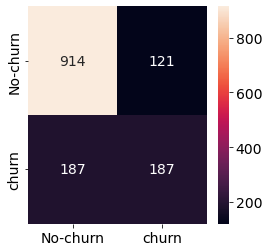

In [51]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm_test=metrics.confusion_matrix(y_test, predicted_labels_test, labels=[0,1])

df_cm_test = pd.DataFrame(cm_test, index = [i for i in ["No-churn","churn"]],
                  columns = [i for i in ["No-churn","churn"]])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_test, annot=True,fmt='g')

#### Insight:
- The model score in train dataset is 93.37%
- The model score in test dataset is 78.14%
- Huge difference in model score between train and test datasets says that model is overfitted in train dataset. Model has not predicted as expected in test dataset.
- 914 non-churned customers are correctly predicted as non-churned customers.
- 187 churned customers are correctly predicted as churned customers.

### Finding best performing parameters along with train and test performance.

In [52]:
xgb_clf.fit(X_train, y_train.values.ravel(),verbose=True,early_stopping_rounds=10, eval_metric='aucpr',eval_set=[(X_test, y_test.values.ravel())])  

[0]	validation_0-aucpr:0.63287
[1]	validation_0-aucpr:0.64442
[2]	validation_0-aucpr:0.64502
[3]	validation_0-aucpr:0.64947
[4]	validation_0-aucpr:0.65939
[5]	validation_0-aucpr:0.66076
[6]	validation_0-aucpr:0.66580
[7]	validation_0-aucpr:0.66497
[8]	validation_0-aucpr:0.66507
[9]	validation_0-aucpr:0.66899
[10]	validation_0-aucpr:0.66852
[11]	validation_0-aucpr:0.66978
[12]	validation_0-aucpr:0.66730
[13]	validation_0-aucpr:0.66223
[14]	validation_0-aucpr:0.66257
[15]	validation_0-aucpr:0.66345
[16]	validation_0-aucpr:0.66029
[17]	validation_0-aucpr:0.65937
[18]	validation_0-aucpr:0.65551
[19]	validation_0-aucpr:0.65528
[20]	validation_0-aucpr:0.65523
[21]	validation_0-aucpr:0.65493


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [53]:
predicted_labels_train = xgb_clf.predict(X_train)

In [54]:
xgb_clf.score(X_train, y_train)

0.8414980475683351

In [55]:
xgb_clf.score(X_test, y_test)

0.7913413768630234

Confusion Matrix


<AxesSubplot:>

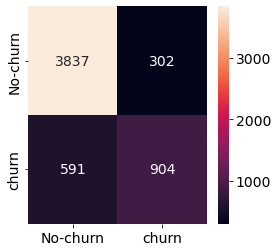

In [56]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm_train=metrics.confusion_matrix(y_train, predicted_labels_train, labels=[0,1])

df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["No-churn","churn"]],
                  columns = [i for i in ["No-churn","churn"]])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_train, annot=True,fmt='g')

In [57]:
predicted_labels_test = xgb_clf.predict(X_test)

Confusion Matrix


<AxesSubplot:>

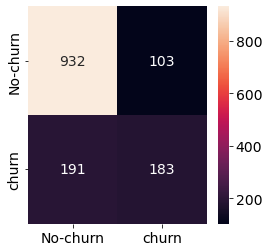

In [58]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm_test=metrics.confusion_matrix(y_test, predicted_labels_test, labels=[0,1])

df_cm_test = pd.DataFrame(cm_test, index = [i for i in ["No-churn","churn"]],
                  columns = [i for i in ["No-churn","churn"]])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_test, annot=True,fmt='g')

#### Best performing parameters for this model xgb_clf are early_stopping_rounds=10, gamma=0, learning_rate=0.300000012, max_depth=6, estimators=100, random_state=5, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5, tree_method='exact'

##### With above parameters below are the insights on performance improvements: 
- The model score in train dataset is 84.14%
- The model score in test dataset has improved from 78.1 to 79.1%
- The model score difference between train and test datasets has reduced.
- Correct predictions for non-churned customers has improved from 906 to 932
- In baseline model, 121 Churned customers were wrongly predicted as non-churned customers. With best performing parameters, the wrong predictions have come down from 121 to 103. 

### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]

#### Setting various tuning parameters and finding the best performing parameters using GridSearchCV: 

In [59]:
param_grid = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0,0.01,0.5,1.0],
    'gamma' : [0,0.01,1.0],
    'reg_lambda' : [0,1.0,10.0],
    'scale_pos_weight' : [1,3,5]
}

In [60]:
xgb_clf_tuned = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', seed=5, subsample=0.5, colsample_bytree=0.5,use_label_encoder=False),
                             param_grid=param_grid, scoring='roc_auc', verbose=2, n_jobs=10,
                             cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)
)

In [61]:
xgb_clf_tuned.fit(X_train,
                  y_train.values.ravel(),
                  verbose=True,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
           eval_set=[(X_test, y_test.values.ravel())]
)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[0]	validation_0-aucpr:0.54745
[1]	validation_0-aucpr:0.62094
[2]	validation_0-aucpr:0.61994
[3]	validation_0-aucpr:0.63758
[4]	validation_0-aucpr:0.63432
[5]	validation_0-aucpr:0.63942
[6]	validation_0-aucpr:0.64335
[7]	validation_0-aucpr:0.64185
[8]	validation_0-aucpr:0.64784
[9]	validation_0-aucpr:0.64803
[10]	validation_0-aucpr:0.65481
[11]	validation_0-aucpr:0.65838
[12]	validation_0-aucpr:0.65570
[13]	validation_0-aucpr:0.65463
[14]	validation_0-aucpr:0.65311
[15]	validation_0-aucpr:0.65506
[16]	validation_0-aucpr:0.65690
[17]	validation_0-aucpr:0.65725
[18]	validation_0-aucpr:0.65686
[19]	validation_0-aucpr:0.65633
[20]	validation_0-aucpr:0.65703


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_chi...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=5, subsample=0.5, tree_method=None,
                                     use_label_encoder=False,
                                

In [62]:
xgb_clf_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=5, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1,
              seed=5, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [63]:
xgb_clf_tuned.best_params_

{'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 5,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1}

In [64]:
xgb_clf_tuned.best_score_

0.8449267375240854

In [65]:
xgb_clf_tuned.score(X_train, y_train)

0.8598155565665047

In [66]:
xgb_clf_tuned.score(X_test, y_test)

0.851371774006045

#### The best performing parameters are gamma=0, learning_rate=0.01, max_depth=5, reg_lambda=1.0, scale_pos_weight=1
#### The score for train and test are ~85% 
#### The score for test has improved from 79.1% to 85.13%

In [67]:
predicted_labels_train = xgb_clf_tuned.predict(X_train)

Confusion Matrix


<AxesSubplot:>

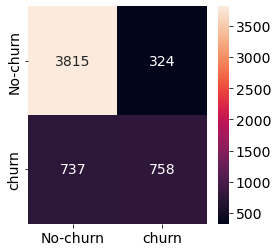

In [68]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm_train=metrics.confusion_matrix(y_train, predicted_labels_train, labels=[0,1])

df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["No-churn","churn"]],
                  columns = [i for i in ["No-churn","churn"]])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_train, annot=True,fmt='g')

In [69]:
predicted_labels_test = xgb_clf_tuned.predict(X_test)

Confusion Matrix


<AxesSubplot:>

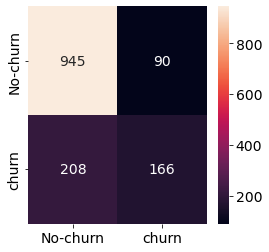

In [70]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm_test=metrics.confusion_matrix(y_test, predicted_labels_test, labels=[0,1])

df_cm_test = pd.DataFrame(cm_test, index = [i for i in ["No-churn","churn"]],
                  columns = [i for i in ["No-churn","churn"]])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_test, annot=True,fmt='g')

#### With use of GridSearchCV, the best performing model xgb_clf_tuned and best  are performing parameters are <br> <br> colsample_bylevel=1, <br> colsample_bynode=1, <br> colsample_bytree=0.5, <br> early_stopping_rounds=10, <br> gamma=0, <br> learning_rate=0.01, <br> max_depth=5, <br> reg_alpha=0, <br> reg_lambda=1.0, <br> scale_pos_weight=1, <br> seed=5, <br> tree_method='exact'

##### With above parameters below are the insights on performance improvements: 
- The model score in train dataset has improved from 84.14% to 85.98%
- The model score in test dataset has improved from 79.1 to 85.13%
- The model scores for both train and test has improved a lot and the difference between train and test datasets has reduced to as low as 0.8%
- Correct predictions for non-churned customers has improved from 914 to 945
- In baseline model, 121 Churned customers were wrongly predicted as non-churned customers. With best performing parameters, the wrong predictions have come down from 121 to 90. 
- False positive and false negatives have also come down in xgb_clf_tuned with best performing parameters.

In [71]:
xgb_clf2 = XGBClassifier(objective='binary:logistic',seed=5, colsample_bytree=0.5,use_label_encoder=False,scoring='roc_auc',
                            verbose=2,n_jobs=10,max_depth=5,learning_rate=0.01,gamma=0,reg_lambda=1.0,scale_pos_weight=1,
                        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5))

In [72]:
xgb_clf2.fit(X_train, y_train.values.ravel(),verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test, y_test.values.ravel())])  

[00:05:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "cv", "scoring", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.55142
[1]	validation_0-aucpr:0.57587
[2]	validation_0-aucpr:0.58271
[3]	validation_0-aucpr:0.62788
[4]	validation_0-aucpr:0.63424
[5]	validation_0-aucpr:0.63913
[6]	validation_0-aucpr:0.64512
[7]	validation_0-aucpr:0.64003
[8]	validation_0-aucpr:0.64295
[9]	validation_0-aucpr:0.64454
[10]	validation_0-aucpr:0.64245
[11]	validation_0-aucpr:0.64619
[12]	validation_0-aucpr:0.64784
[13]	validation_0-aucpr:0.64803
[14]	validation_0-aucpr:0.64440
[15]	validation_0-aucpr:0.64220
[16]	validation_0-aucpr:0.64080
[17]	validation_0-aucpr:0.64230
[18]	validation_0-aucp

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=10, num_parallel_tree=1,
              predictor='auto', random_state=5, reg_alpha=0, reg_lambda=1.0,
              scale_pos_weight=1, scoring='roc_auc', seed=5, subsample=1,
              tree_method='exact', use_label_encoder=False, ...)

In [73]:
xgb_clf2.score(X_train, y_train)

0.8115015974440895

In [74]:
xgb_clf2.score(X_train, y_train)

0.8115015974440895

In [75]:
y_pred = xgb_clf2.predict(X_test)

In [76]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1161
           1       0.44      0.66      0.53       248

    accuracy                           0.79      1409
   macro avg       0.68      0.74      0.70      1409
weighted avg       0.83      0.79      0.81      1409



# Part B - 30 Marks

## • STEPS AND TASK [30 Marks]:
## 1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
## 2. Create separate functions for various purposes.

#### Reading all the files, merge the files, prepare the data and get insights from the dataframe:

In [77]:
### Function to read single file or list of  files
def data_extraction(file_list,join_key):
    merged_df = reduce(lambda l_df,r_df: l_df.merge(r_df, on=join_key), [pd.read_csv(file) for file in file_list])
    print("Input dataframe shape :{}".format(merged_df.shape))
    return merged_df

In [78]:
### Function to identify columns which has null values or blank values
def df_null_blank_analysis(df):
    null_cols=[]
    blank_cols=[]
    for cols in df.columns:
        print("Number of null values for {0} cols is {1}".format(cols,df[cols].isnull().sum()))
        print("\nUnique values and its counts for {}".format(cols))
        print(df[cols].value_counts())
        print("\n*********************************************")
        if df[cols].isnull().sum() > 0:
            null_cols.append(cols)
        if df[cols].eq(' ').sum() > 0:
            blank_cols.append(cols)
 
    print("#########List of columns which has null value :{}".format(null_cols))    
    print("\n*********************************************")
    print("#########List of columns which has blank value :{}".format(blank_cols))    
    print("\n*********************************************")

In [79]:
### Function to print various insights on the data
def data_insights(df):
    print("\n###########Shape of the dataframe   : {}".format(df.shape))
    print("\n###########Sample from dataframe    : \n")
    print(df.head())
    print("\n###########Info about the dataframe : \n")
    df.info()
    print("\n###########Describe on dataframe    : \n")
    print(df.describe())
    print("\n###########Analyzing nulls and blanks in dataframe    : \n")
    df_null_blank_analysis(df)

#### Calling data_extraction and data_insights

In [80]:
file_list=["TelcomCustomer-Churn_1.csv","TelcomCustomer-Churn_2.csv"]
join_key='customerID'
telecom_df=data_extraction(file_list,join_key)

Input dataframe shape :(7043, 21)


In [81]:
data_insights(telecom_df)


###########Shape of the dataframe   : (7043, 21)

###########Sample from dataframe    : 

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             

#### Perform transformations on the dataframe

In [82]:
### Function to convert the data types for numerical columns
def dtype_conversion(df,num_cols):
    num_cols=["MonthlyCharges","TotalCharges"]
    for cols in num_cols:
        df[cols]=df[cols].astype(float)
    return df

In [83]:
### Function to perform various transformations on the data
def data_preprocessing(telecom_df):
    str_categorical_cols=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService",
                          "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",
                          "PaperlessBilling","PaymentMethod","Churn"]
    for col in str_categorical_cols:
        telecom_df[col]=telecom_df[col].str.lower()

    replaceStruct = {"gender": {"male": 0, "female": 1},"Partner": {"no": 0, "yes": 1},"Dependents": {"no": 0, "yes": 1},"PhoneService": {"no": 0, "yes": 1},
                     "MultipleLines": {"no phone service": "no_phone_service"},"InternetService": {"no": 0, "dsl": 1, "fiber optic": 2},
                     "OnlineSecurity": {"no internet service": "no_internet_service"},"OnlineBackup": {"no internet service": "no_internet_service"},
                     "DeviceProtection": {"no internet service": "no_internet_service"},"TechSupport": {"no internet service": "no_internet_service"},
                     "StreamingTV": {"no internet service": "no_internet_service"},"StreamingMovies": {"no internet service": "no_internet_service"},
                     "Contract": {"month-to-month": 1, "one year": 2,"two year": 3}, "PaperlessBilling": {"no": 0, "yes": 1},"Churn": {"no": 0, "yes": 1},
                     "PaymentMethod": {"bank transfer (automatic)":"bank_transfer","credit card (automatic)":"credit_card",
                                       "electronic check":"electronic_check","mailed check" :"mailed_check"},
                     "TotalCharges": {" ": 0}
                    }
    oneHotCols=["MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaymentMethod"]
    
    telecom_df=telecom_df.replace(replaceStruct)
    telecom_df=pd.get_dummies(telecom_df, columns=oneHotCols)
    telecom_df.head()

    numerical_cols=["MonthlyCharges","TotalCharges"]
    telecom_df=dtype_conversion(telecom_df,numerical_cols)
    print("\n###########Info about the dataframe : \n")
    telecom_df.info()
    return telecom_df

#### Calling data_transformation and get the final converted dataframe

In [84]:
telecom_final=data_preprocessing(telecom_df)


###########Info about the dataframe : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7043 non-null   object 
 1   gender                                7043 non-null   int64  
 2   SeniorCitizen                         7043 non-null   int64  
 3   Partner                               7043 non-null   int64  
 4   Dependents                            7043 non-null   int64  
 5   tenure                                7043 non-null   int64  
 6   PhoneService                          7043 non-null   int64  
 7   InternetService                       7043 non-null   int64  
 8   Contract                              7043 non-null   int64  
 9   PaperlessBilling                      7043 non-null   int64  
 10  MonthlyCharges                        7043 

In [85]:
print("\n###########Sample records from dataframe : \n")
telecom_final.head()


###########Sample records from dataframe : 



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,...,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,PaymentMethod_bank_transfer,PaymentMethod_credit_card,PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,7590-VHVEG,1,0,1,0,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,1,2,0,...,1,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,1,2,0,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,2,1,1,...,1,0,0,1,0,0,0,0,1,0


In [86]:
telecom_final.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,...,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,PaymentMethod_bank_transfer,PaymentMethod_credit_card,PaymentMethod_electronic_check,PaymentMethod_mailed_check
7038,6840-RESVB,0,0,1,1,24,1,1,2,1,...,0,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,2,2,1,...,0,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,2,1,1,...,1,0,0,1,0,0,0,0,0,1
7042,3186-AJIEK,0,0,0,0,66,1,2,3,1,...,0,0,1,0,0,1,1,0,0,0


## 3. Various base models should be trained to select the best performing model

#### Build Machine Learning pipelines

In [87]:
### Function to split the data for the given percentage
def split_df(df, perc):
    X=df.drop(columns=['customerID','Churn'],axis=1)
    y=df[['Churn']]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=perc,random_state=5,stratify=y)
    return X_train,X_test,y_train,y_test

In [88]:
# Define the ML pipelines
ml_pipelines = {
    "GBC": make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    "XGB": make_pipeline(XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='aucpr')),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "LogReg": make_pipeline(StandardScaler(), LogisticRegression()),
    "DTree": make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    "GNB": make_pipeline(StandardScaler(), GaussianNB()),
    "RF": make_pipeline(StandardScaler(), RandomForestClassifier())
}

In [89]:
### Function to execution all the defined ML pipelines in loop
def pipeline_execution(pipelines,X_train,y_train,X_test,y_test):
    model_results=[]
    ### Execute all models defined in pipelines and get the accuracy scores
    for model in pipelines:
        res={}
        base_model = pipelines[model]
        base_model.fit(X_train, y_train.values.ravel())
        
        res["model_name"]=model
        res["train_score"]=base_model.score(X_train, y_train.values.ravel())
        res["test_score"]=base_model.score(X_test, y_test.values.ravel())
        predicted_labels = base_model.predict(X_test)
        res["accuracy_score"]=accuracy_score(y_test.values.ravel(), predicted_labels) * 100
        model_results.append(res)

    ### Convert the model_results to pandas daatframe and display
    print("-------Completed all pipelines-------")

    results_df=pd.DataFrame(model_results)
    return results_df

#### Calling split_df and pipeline_execution functions

In [90]:
X_train,X_test,y_train,y_test=split_df(telecom_final,perc=0.20)
results_df=pipeline_execution(ml_pipelines,X_train,y_train,X_test,y_test)

-------Completed all pipelines-------


#### Showing the results of all ML pipelines

In [91]:
results_df.head(10)

,model_name,train_score,test_score,accuracy_score
0,GBC,0.829961,0.794890,79.488999
1,XGB,0.933795,0.781405,78.140525
2,KNN,0.832091,0.764372,76.437189
3,LogReg,0.809904,0.788502,78.850248
4,DTree,0.997515,0.721789,72.178850
5,GNB,0.680689,0.675656,67.565649
6,RF,0.997515,0.794180,79.418027


### Insights:
##### From the above results, sklearn's GradientBoostingClassifier is the best performing model. <br> <br> Few models which are closer to GradientBoostingClassifier are Logistic regression, XGBoost and Random Forest. <br><br><br>Let us find the best parameters for GradientBoostingClassifier model.

In [92]:
### Function to find the best parameters for the Gradient Boosting Classifier model
def finding_best_parameters():
    gbc_param_grid = {
        "gradientboostingclassifier__loss" : ["deviance", "exponential"], 
        "gradientboostingclassifier__n_estimators" : [n for n in np.arange(100,800,200)],
        "gradientboostingclassifier__max_depth" : [3,5,7]
    }

    gbc_grid = GridSearchCV(ml_pipelines["GBC"], param_grid = gbc_param_grid,
                            cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=5), n_jobs=10, scoring="accuracy")

    gbc_grid.fit(X,y.values.ravel())

    print("###### GBC GridSearch results ######")
    print( "\nBest Estimator               : {}".format(gbc_grid.best_estimator_))
    print( "\nBest Params                  : {}".format(gbc_grid.best_params_))
    print( "\nBest Scores                  : {}".format(gbc_grid.best_score_))
    print( "\nScore accuracy for train dataset : {}".format(gbc_grid.score(X_train, y_train)))
    print( "\nScore accuracy for test dataset  : {}".format(gbc_grid.score(X_test, y_test)))

#### Calling finding_best_parameters function

In [93]:
finding_best_parameters()

###### GBC GridSearch results ######

Best Estimator               : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(loss='exponential'))])

Best Params                  : {'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 100}

Best Scores                  : 0.8056224348649561

Score accuracy for train dataset : 0.8239261625843095

Score accuracy for test dataset  : 0.8168914123491838


## 4. Pickle file should be saved for the best performing model.

In [94]:
### Function to save the tuned model as pickle file
def save_tuned_model(file_name):
    ###create a model using the best parameters identified 
    gbc_tuned = GradientBoostingClassifier(loss="exponential", n_estimators=100, max_depth=3)

    gbc_tuned.fit(X_train, y_train.values.ravel())
    pickle.dump(gbc_tuned, open(file_name, 'wb'))

#### Define the file_name and save the tuned model as pickle file

In [95]:
file_name='gbc_model.pkl'
save_tuned_model(file_name)

In [96]:
### Function for calculating recall of churn=0 
def recall_0(correct, pred):
    return metrics.recall_score(y_true=correct, y_pred=pred, pos_label=0, average="binary")

### Function for calculating recall of churn=1
def recall_1(correct, pred):
    return metrics.recall_score(y_true=correct, y_pred=pred, pos_label=1, average="binary")

### Function for getting and displaying score
def print_metrics(model,X_train,y_train,X_test,y_test):
    y_pred = model.predict(X_test)
    
    ## Print classification report
    print("Classification report for {}:\n{}".format(model, metrics.classification_report(y_test, y_pred)))

    ## Print Cross-Validation results
    scoring = {
        "f1": "f1",
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
        "recall_0": metrics.make_scorer(recall_0),
        "recall_1": metrics.make_scorer(recall_1) }
    
    cv_scores = cross_validate(model, X, y.values.ravel(), scoring=scoring, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=5))

    for c in cv_scores:
        print("Metric: {}, Mean_value: {}".format(c,np.mean(cv_scores[c])))
    
    ### Print the confusion matrix for train dataset
    print("Confusion Matrix for train dataset:")
    cm_train=metrics.confusion_matrix(y_train, model.predict(X_train), labels=[0,1])

    df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["No-churn","churn"]],
                      columns = [i for i in ["No-churn","churn"]])
    plt.figure(figsize = (4,4))
    sns.heatmap(df_cm_train, annot=True,fmt='g')
    
    ### Print the confusion matrix for test dataset
    print("Confusion Matrix for test dataset:")
    cm_test=metrics.confusion_matrix(y_test, model.predict(X_test), labels=[0,1])

    df_cm_test = pd.DataFrame(cm_test, index = [i for i in ["No-churn","churn"]],
                      columns = [i for i in ["No-churn","churn"]])
    plt.figure(figsize = (4,4))
    sns.heatmap(df_cm_test, annot=True,fmt='g')

In [97]:
### Function to load the model using teh pickle file provided
def load_model(file_name):
    loaded_model = pickle.load(open(file_name, 'rb'))
    
    return loaded_model

In [98]:
### Function to calculate scores and also print various metrics like classification report,mean values of scoring metrics, confusion metrics etc
def model_scoring(model,X_train,y_train,X_test,y_test):
    train_results=model.score(X_train, y_train)
    test_results=model.score(X_test, y_test)
    print("Train score results :{}".format(train_results))
    print("Test score results  :{}".format(test_results))
    
    ### Print Classification report and Cross-Validation results
    print_metrics(model,X_train,y_train,X_test,y_test)


Train score results :0.8257011004614838
Test score results  :0.7984386089425124
Classification report for GradientBoostingClassifier(loss='exponential'):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Metric: fit_time, Mean_value: 1.4929999828338623
Metric: score_time, Mean_value: 0.009992480278015137
Metric: test_f1, Mean_value: 0.5906972763515494
Metric: test_accuracy, Mean_value: 0.8056227836879433
Metric: test_precision, Mean_value: 0.668903017095082
Metric: test_recall, Mean_value: 0.5296935196365937
Metric: test_recall_0, Mean_value: 0.9052900233751296
Metric: test_recall_1, Mean_value: 0.5296935196365937
Confusion Matrix for train dataset:
Confusion Matrix for test dataset:


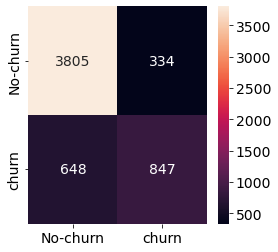

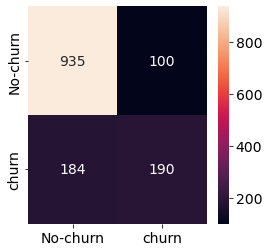

In [99]:
loaded_model=load_model(file_name)
model_scoring(loaded_model,X_train,y_train,X_test,y_test)

### Insights:
- The model score in train dataset is 82.57%
- The model score in test dataset is 79.84%
- The model scores difference between train and test datasets has reduced.
- Number of correct predictions for non-churned customers is 935
- Number of correct predictions for churned customers is 190
- Recall value for non-churned customer is 90.52%

## Industry approach of coding which includes below best coding practices in the code:
- Modularization
- Maintainability
- Well commented code etc

Input dataframe shape :(7043, 21)

###########Shape of the dataframe   : (7043, 21)

###########Sample from dataframe    : 

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4             


###########Info about the dataframe : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7043 non-null   object 
 1   gender                                7043 non-null   int64  
 2   SeniorCitizen                         7043 non-null   int64  
 3   Partner                               7043 non-null   int64  
 4   Dependents                            7043 non-null   int64  
 5   tenure                                7043 non-null   int64  
 6   PhoneService                          7043 non-null   int64  
 7   InternetService                       7043 non-null   int64  
 8   Contract                              7043 non-null   int64  
 9   PaperlessBilling                      7043 non-null   int64  
 10  MonthlyCharges                        7043 

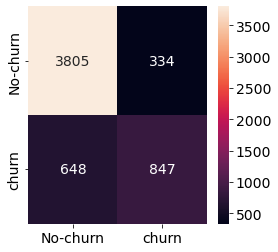

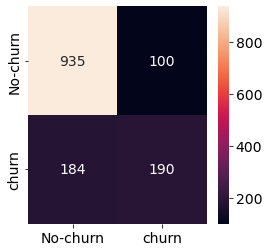

In [101]:
if __name__ == '__main__':
    try:
        # Extract the data from list of .csv files
        file_list=["TelcomCustomer-Churn_1.csv","TelcomCustomer-Churn_2.csv"]
        join_key='customerID'
        telecom_df=data_extraction(file_list,join_key)

        # Getting insights from extracted data
        data_insights(telecom_df)

        # Perform data pre-processing to apply various transformations on the extracted data
        telecom_final=data_preprocessing(telecom_df)
        print("\n###########Sample records from dataframe : \n")
        telecom_final.head()
        telecom_final.tail()

        # Define ML pipelines
        ml_pipelines = {
            "GBC": make_pipeline(StandardScaler(), GradientBoostingClassifier()),
            "XGB": make_pipeline(XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='aucpr')),
            "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
            "LogReg": make_pipeline(StandardScaler(), LogisticRegression()),
            "DTree": make_pipeline(StandardScaler(), DecisionTreeClassifier()),
            "GNB": make_pipeline(StandardScaler(), GaussianNB()),
            "RF": make_pipeline(StandardScaler(), RandomForestClassifier())
        }

        # Split the data into train and test 
        X_train,X_test,y_train,y_test=split_df(telecom_final,perc=0.20)

        # Execute all the ML pipelines defined 
        results_df=pipeline_execution(ml_pipelines,X_train,y_train,X_test,y_test)
        results_df.head(10)

        # Find the best parameter for the Gradient Boosting Classifier model
        finding_best_parameters()

        # Save the fine tuned model as pickle file
        file_name='gbc_model.pkl'
        save_tuned_model(file_name)

        # Load the fine tuned model from pickle file and print various metrics for the tuned model
        loaded_model=load_model(file_name)
        model_scoring(loaded_model,X_train,y_train,X_test,y_test)
        
    except Exception as e:
        print("Exception is raised and the error is :{}".format(e))
        
    

# THE END